SVM Classifier
 0.975 Precision: 0.9766666666666666 Recall: 0.975
Naïve Bayes Classifier
 0.875 Precision: 0.9324999999999999 Recall: 0.875
Regression (Linear Regression)
 52.04859964112309 R2 Score: 0.024657375870589582


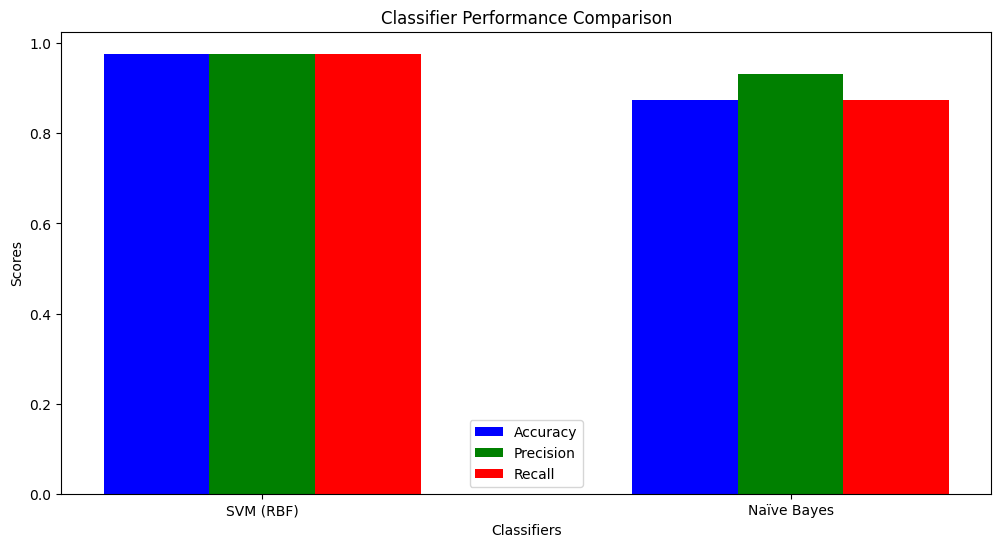

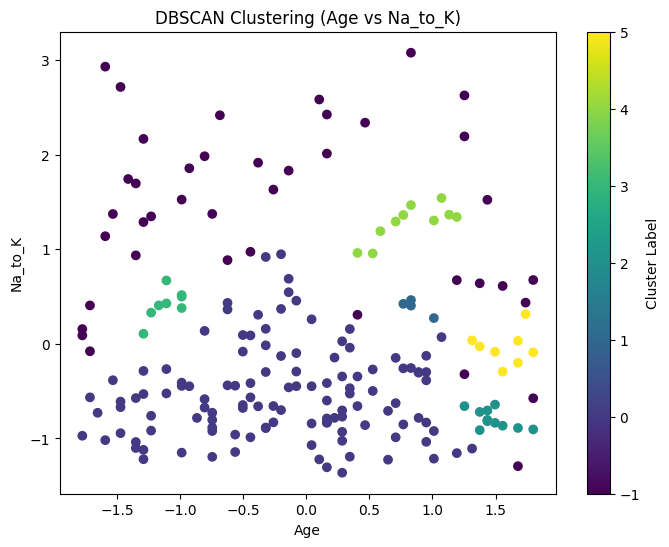

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score

data = pd.read_csv('drug200.csv')

# Encode categorical features
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convert 'F' and 'M' to 0 and 1
data['BP'] = label_encoder.fit_transform(data['BP'])  # Convert BP categories to numerical values
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])  # Convert Cholesterol categories

# Features and target for classification
X_clf = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
Y_clf = data['Drug'].values  # Target variable for classification

# Features and target for regression
X_reg = data[['Age', 'Sex', 'BP', 'Cholesterol']].values
Y_reg = data['Na_to_K'].values  # Target variable for regression

# Train-test split for classification
X_train_clf, X_test_clf, Y_train_clf, Y_test_clf = train_test_split(X_clf, Y_clf, test_size=0.20, random_state=0)

# Train-test split for regression
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg, Y_reg, test_size=0.20, random_state=0)

# Feature scaling
scaler_clf = StandardScaler()
X_train_clf = scaler_clf.fit_transform(X_train_clf)
X_test_clf = scaler_clf.transform(X_test_clf)

scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

#  Classification Models 

# Support Vector Classifier (SVC)
classifier1 = SVC(kernel='rbf', random_state=0)
classifier1.fit(X_train_clf, Y_train_clf)
Y_pred1 = classifier1.predict(X_test_clf)

# Naïve Bayes Classifier
classifier2 = GaussianNB()
classifier2.fit(X_train_clf, Y_train_clf)
Y_pred2 = classifier2.predict(X_test_clf)

#  Clustering Model 

# Select only Age and Na_to_K for DBSCAN
X_dbscan = data[['Age', 'Na_to_K']].values

# Feature scaling for DBSCAN
scaler_dbscan = StandardScaler()
X_dbscan_scaled = scaler_dbscan.fit_transform(X_dbscan)

# DBSCAN: Tune eps and min_samples
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps for better clustering
dbscan.fit(X_dbscan_scaled)
labels_dbscan = dbscan.labels_

#  Regression Model (Linear Regression) 

regressor = LinearRegression()
regressor.fit(X_train_reg, Y_train_reg)
Y_pred_reg = regressor.predict(X_test_reg)

#  Performance Metrics 

# Classification Metrics
accuracy_svm = accuracy_score(Y_test_clf, Y_pred1)
precision_svm = precision_score(Y_test_clf, Y_pred1, average='weighted', zero_division=0)
recall_svm = recall_score(Y_test_clf, Y_pred1, average='weighted', zero_division=0)

accuracy_nb = accuracy_score(Y_test_clf, Y_pred2)
precision_nb = precision_score(Y_test_clf, Y_pred2, average='weighted', zero_division=0)
recall_nb = recall_score(Y_test_clf, Y_pred2, average='weighted', zero_division=0)

# Regression Metrics
mse_reg = mean_squared_error(Y_test_reg, Y_pred_reg)
r2_reg = r2_score(Y_test_reg, Y_pred_reg)

#  Print Results 

print("SVM Classifier\nAccuracy:", accuracy_svm, "Precision:", precision_svm, "Recall:", recall_svm)
print("Naïve Bayes Classifier\nAccuracy:", accuracy_nb, "Precision:", precision_nb, "Recall:", recall_nb)
print("Regression (Linear Regression)\nMSE:", mse_reg, "R2 Score:", r2_reg)

#  Visualization 

# Classifier performance visualization
classifiers = ['SVM (RBF)', 'Naïve Bayes']
accuracy_scores = [accuracy_svm, accuracy_nb]
precision_scores = [precision_svm, precision_nb]
recall_scores = [recall_svm, recall_nb]

x = np.arange(len(classifiers))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - width, accuracy_scores, width, label='Accuracy', color='b')
plt.bar(x, precision_scores, width, label='Precision', color='g')
plt.bar(x + width, recall_scores, width, label='Recall', color='r')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classifier Performance Comparison')
plt.xticks(x, classifiers)
plt.legend()
plt.show()

#  DBSCAN Visualization 

# DBSCAN scatter plot: Age vs Na_to_K
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_dbscan_scaled[:, 0], X_dbscan_scaled[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering (Age vs Na_to_K)")
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.colorbar(scatter, label='Cluster Label')
plt.show()
